## Image Classification

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
# Convert 2D array to 1D array, -1 bcz we want to keep the first dimension as it is (10000) n flatten the 2nd dimension 
# so leave it blank
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [20]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

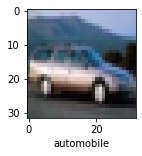

In [24]:
plot_sample(X_train, y_train, 4)

In [27]:
# Normalization
X_train = X_train /255
X_test = X_test /255

In [30]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 27s 17ms/step - loss: 1.8580 - accuracy: 0.3360
Epoch 2/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6569 - accuracy: 0.4125
Epoch 3/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5687 - accuracy: 0.4448
Epoch 4/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5076 - accuracy: 0.4666
Epoch 5/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4568 - accuracy: 0.4857


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
# y_pred[:5]
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: ",classification_report(y_test, y_pred_classes))

Classification Report:                precision    recall  f1-score   support

           0       0.75      0.29      0.42      1000
           1       0.56      0.66      0.61      1000
           2       0.34      0.36      0.35      1000
           3       0.39      0.24      0.30      1000
           4       0.63      0.17      0.26      1000
           5       0.37      0.43      0.39      1000
           6       0.45      0.64      0.53      1000
           7       0.41      0.66      0.51      1000
           8       0.65      0.58      0.61      1000
           9       0.47      0.66      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [33]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4930 - accuracy: 0.4620
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1701 - accuracy: 0.5888
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.0488 - accuracy: 0.63280s - los
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9638 - accuracy: 0.6640
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9014 - accuracy: 0.6842
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8511 - accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8133 - accuracy: 0.7164
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7743 - accuracy: 0.7287
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7378 - accuracy: 0.7425
Epoch 10/10
1563/1563 [==============================] -

In [37]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9540 - accuracy: 0.6826


[0.9540321230888367, 0.6826000213623047]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

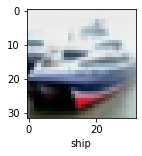

In [40]:
y_test =y_test.reshape(-1,)
plot_sample(X_test,y_test, 1)

In [41]:
y_pred = cnn.predict(X_test)
y_pred

array([[4.82973468e-04, 1.02257764e-05, 5.74742618e-04, ...,
        4.03503276e-04, 3.63825285e-03, 9.06263376e-05],
       [8.63531546e-04, 6.54361248e-02, 5.99546001e-06, ...,
        6.62600996e-08, 9.33649182e-01, 3.81770296e-05],
       [1.42099615e-02, 1.21870339e-01, 7.80604547e-03, ...,
        5.01966802e-04, 7.87751734e-01, 2.12704600e-03],
       ...,
       [1.64361318e-05, 1.20162980e-07, 2.82632597e-02, ...,
        4.69412003e-03, 3.24905450e-05, 2.41350108e-06],
       [2.24625524e-02, 2.32649714e-01, 7.68725155e-03, ...,
        1.32439518e-03, 7.14686830e-05, 2.83320078e-05],
       [2.74591389e-06, 3.48051799e-06, 1.23748207e-04, ...,
        9.92343247e-01, 1.20875470e-08, 4.04475895e-06]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [43]:
classes[y_classes[1]]

'ship'

In [45]:
print("Classification Report: ",classification_report(y_test, y_classes))

Classification Report:                precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.83      0.79      0.81      1000
           2       0.58      0.54      0.56      1000
           3       0.48      0.54      0.51      1000
           4       0.59      0.64      0.61      1000
           5       0.60      0.58      0.59      1000
           6       0.73      0.79      0.76      1000
           7       0.70      0.73      0.72      1000
           8       0.79      0.82      0.80      1000
           9       0.86      0.68      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

